In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Covid_Data.csv')

In [3]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [4]:
data['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

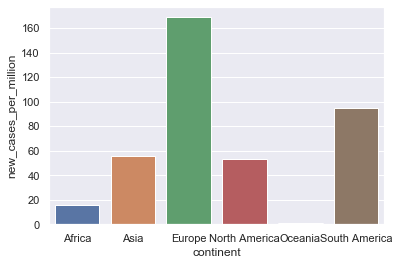

In [119]:
#creating sample data grouped by continent
continent_wise_data = data.groupby('continent').mean()

#ploting average new cases per million for each continent
sb.barplot(x=continent_wise_data.index,y='new_cases_per_million',data=continent_wise_data)

# Creating India_data

In [5]:
data_india = data[data.location=='India']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
34394,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
34395,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
34396,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
34397,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
34398,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


# New Cases in India per day

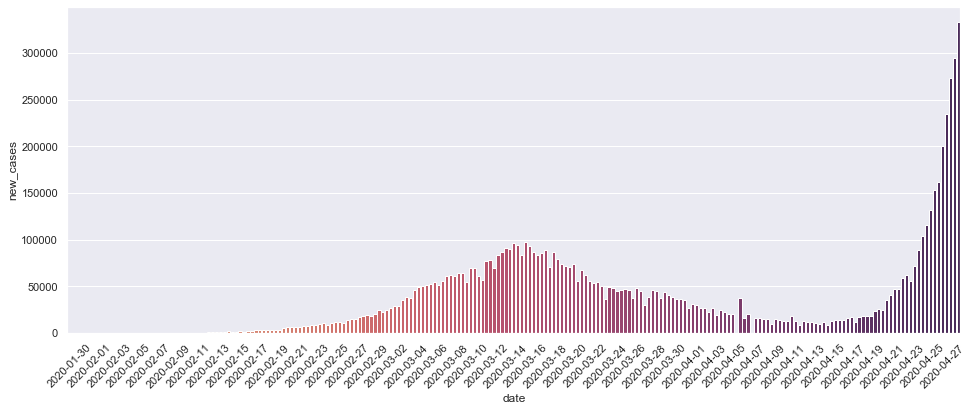

In [138]:
#defining figure size
plt.figure(figsize=(16,6))

#plotting bar graph for new cases against the date of first case
ax = sb.barplot(x='date', y='new_cases', palette='flare', data= data_india[::2])

#defining xlabels to show
ax.set_xticks(ax.get_xticks()[::5])
#rotating x labels
plt.xticks(rotation=45)
plt.show()

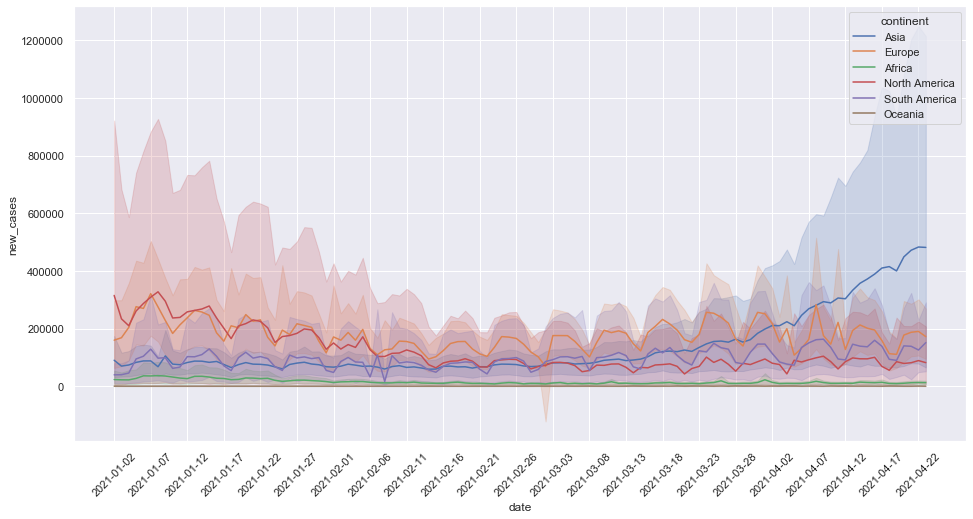

In [154]:
#setting size
plt.figure(figsize=(16,8))

#plotting total new case worldwide from 1 Jan, 2021
ax = sb.lineplot(x='date',y='new_cases', data = data[data.date >'2021-01-01'], hue='continent',estimator='sum')

#setting xticks to be visible
ax.set_xticks(ax.get_xticks()[::5])
plt.xticks(rotation=45) #rotaion of xlabel
plt.show()

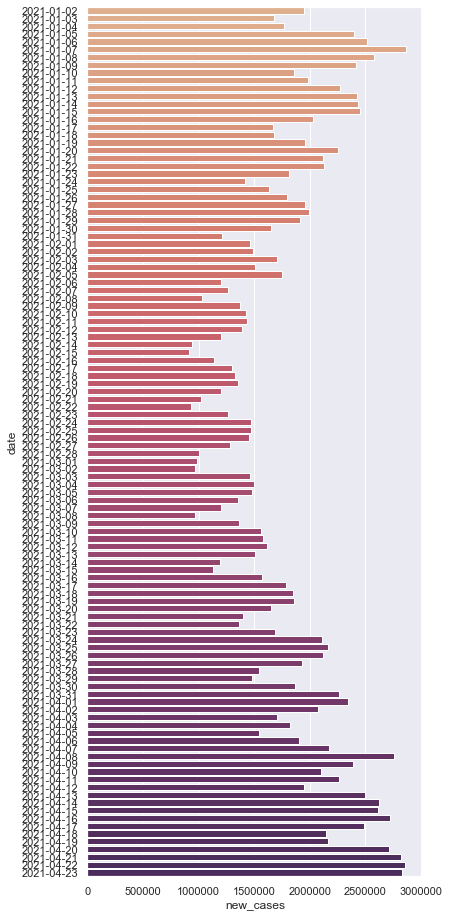

In [147]:
#figure size
plt.figure(figsize=(6,16))

#creating sample data for year 2021 grouped by date!
d=data[data.date>'2021-01-01'].groupby('date').sum()

#plot
sb.barplot(x='new_cases', y=d.index,data=d,palette='flare', orient='h')


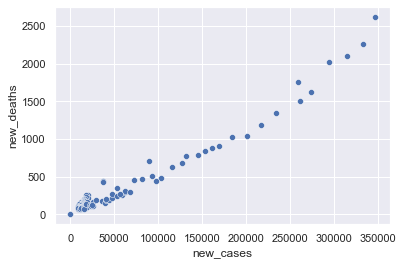

In [169]:
#creating data for india 2021
data_india_2021 = data_india[data_india.date >= '2021-01-01']

#scatter plot for new_cases vs new_death
sb.scatterplot(x='new_cases',y='new_deaths',data=data_india_2021)

plt.show()

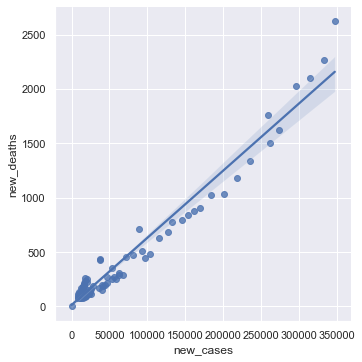

In [161]:
#new_death per new cases in india for year 2021 : regression
sb.lmplot(x='new_cases',y='new_deaths',data=data_india_2021)

# Dual Axis Plot

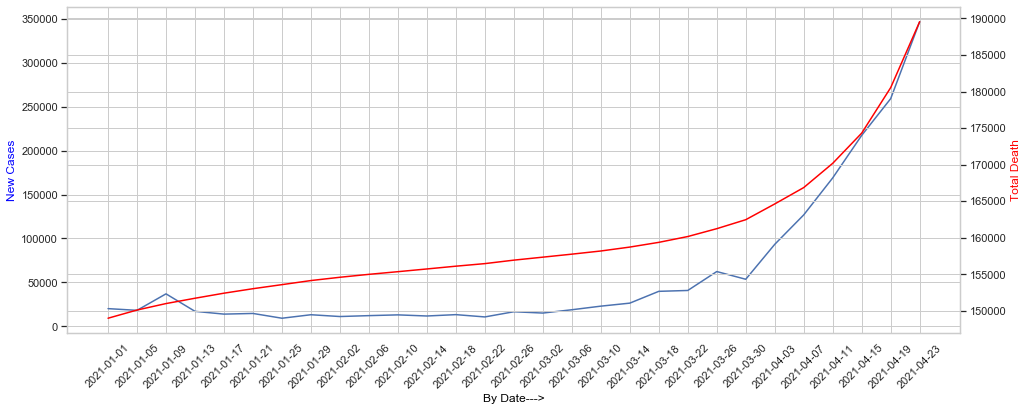

In [183]:
#setting theme and figure size
sb.set_theme(style='whitegrid')
plt.figure(figsize=(16,6))

#new_cases in India for year 2021 on object axes
axes = sb.lineplot(x='date', y='new_cases',data=data_india_2021[0::4])
axes.set(xlabel='By Date--->',ylabel='New Cases')
axes.xaxis.label.set_color('black')
axes.yaxis.label.set_color('blue')

#setting object ax2 as twin with object axes
ax2 = axes.twinx()

#total_cases in India for year 2021 on object ax2
ax2 = sb.lineplot(x='date', y='total_deaths',data=data_india_2021[0::4],color='red')
ax2.set(ylabel='Total Death')
ax2.yaxis.label.set_color('red')

plt.xticks(rotation=45)
plt.show()

# Plotting with data visible on plot

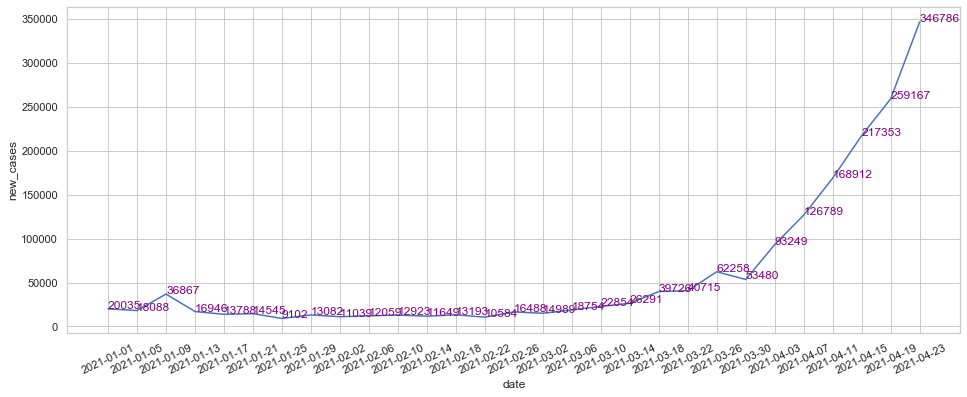

In [188]:
#setting theme and figure size
sb.set_theme(style='whitegrid')
plt.figure(figsize=(16,6))

#
axes = sb.lineplot(x='date', y='new_cases',data=data_india_2021[0::4])
#axes.set_xticklabels(labels=xlabels,rotation=25)

for x,y in zip(xlabels,data_india_2021['new_cases'][0::4]):
    plt.text(x=x, y=y+150,s='{:.0f}'.format(y),color='purple')

plt.xticks(rotation=25)
plt.show()

Matplotlib Plotting

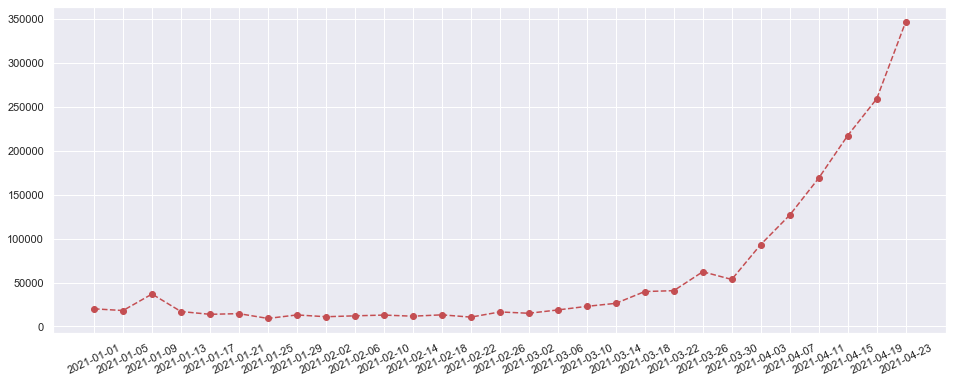

In [190]:
sb.set_theme(style='darkgrid')
plt.figure(figsize=(16,6))
xlabels = list(data_india_2021['date'][0::4])
plt.plot(xlabels, 'new_cases','--or',data=data_india_2021[0::4])
plt.xticks(rotation=25)
plt.show()

# Enhanced Bar Plot with modified data

In [192]:
dg = data.groupby(['date','continent']).sum()
dg

total_cases  new_cases  new_cases_smoothed  \
date       continent                                                   
2020-01-01 North America          0.0        0.0               0.000   
           South America          0.0        0.0               0.000   
2020-01-02 North America          0.0        0.0               0.000   
           South America          0.0        0.0               0.000   
2020-01-03 North America          0.0        0.0               0.000   
...                               ...        ...                 ...   
2021-04-23 Asia            36102611.0   481331.0          444080.286   
           Europe          43930132.0   171796.0          158132.856   
           North America   37051725.0    81560.0           76966.856   
           Oceania            42709.0       15.0             168.143   
           South America   24025461.0   150956.0          125059.143   

                          total_deaths  new_deaths  new_deaths_smoothed  \
date       continent                                                      
2020-01-01 North America           0.0         0.0                0.000   
           South America           0.0         0.0                0.000   
2020-01-02 North America           0.0         0.0                0.000   
           South America           0.0         0.0                0.000   
2020-01-03 North America           0.0         0.0                0.000   
...                                ...         ...                  ...   
2021-04-23 Asia               486137.0      4121.0             3575.146   
           Europe             995899.0      3641.0             3324.572   
           North America      839500.0      1452.0             1246.286   
           Oceania              1038.0         0.0                2.572   
           South America      643957.0      4702.0             4016.142   

                          total_cases_per_million  new_cases_per_million  \
date       continent                                                       
2020-01-01 North America                    0.000                  0.000   
           South America                    0.000                  0.000   
2020-01-02 North America                    0.000                  0.000   
           South America                    0.000                  0.000   
2020-01-03 North America                    0.000                  0.000   
...                                           ...                    ...   
2021-04-23 Asia                       1099144.238               6261.859   
           Europe                     3291454.314              11909.989   
           North America               504993.851               1661.342   
           Oceania                       3086.968                  0.588   
           South America               471134.634               4397.182   

                          new_cases_smoothed_per_million  \
date       continent                                       
2020-01-01 North America                           0.000   
           South America                           0.000   
2020-01-02 North America                           0.000   
           South America                           0.000   
2020-01-03 North America                           0.000   
...                                                  ...   
2021-04-23 Asia                                 6050.270   
           Europe                              11274.607   
           North America                        1449.992   
           Oceania                                20.350   
           South America                        3483.929   

                          total_deaths_per_million  ...  gdp_per_capita  \
date       continent                                ...                   
2020-01-01 North America                     0.000  ...       17336.469   
           South America                     0.000  ...       18933.907   
2020-01-02 North America                   

# Continent-wise New Cases of Month April

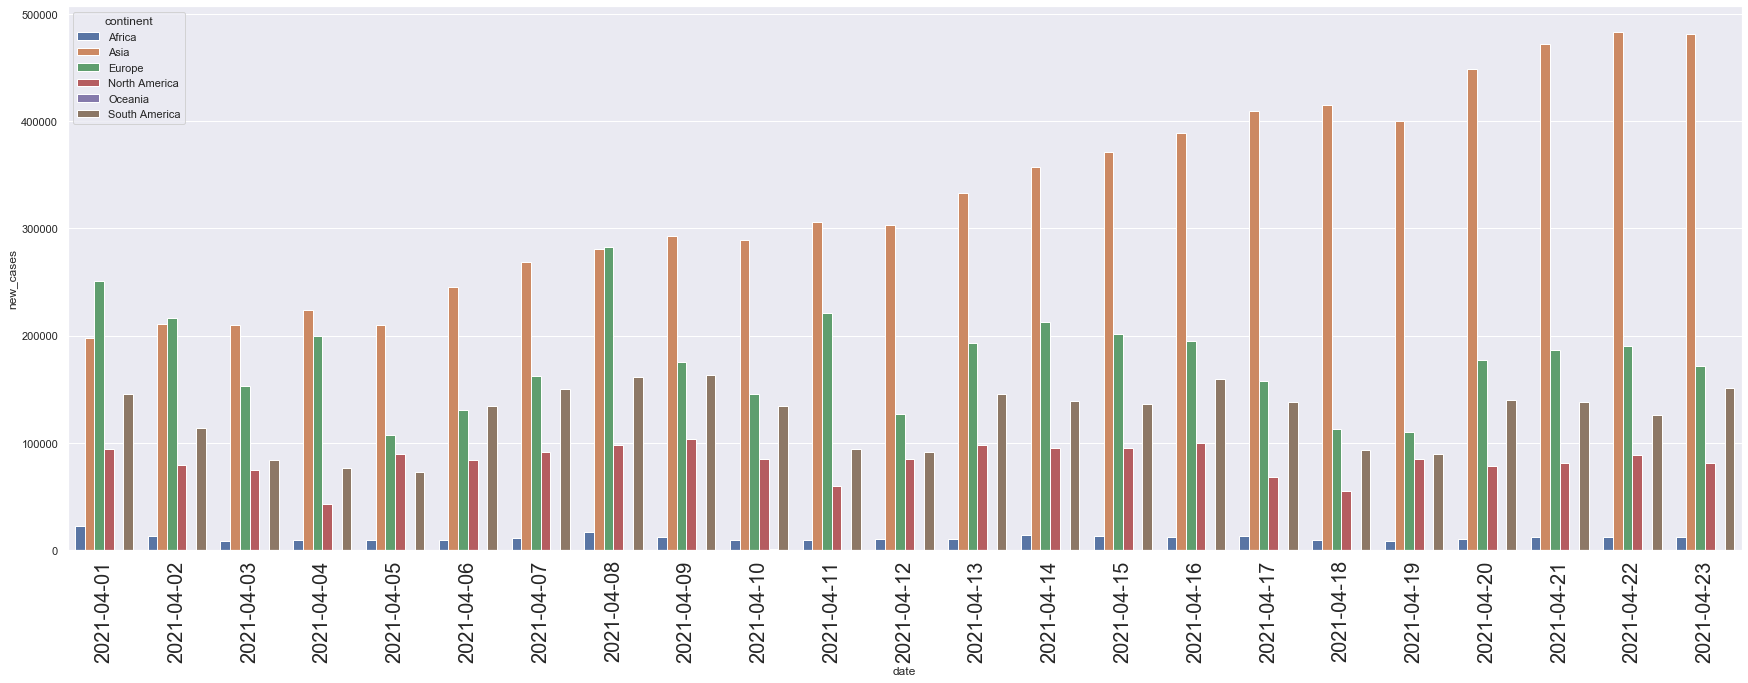

In [205]:
#setting theme and figure size
sb.set_theme(style='darkgrid')
plt.figure(figsize=(30,10))

#resetting index for Data grouped by date and continent to date
dg1 =dg.reset_index().set_index('date')
data_grouped_April_2021 = dg1[dg1.index >= '2021-04-01']
ax1 = sb.barplot(x= data_grouped_April_2021.index, y='new_cases', data=data_grouped_April_2021, hue='continent')

plt.xticks(rotation=90, size=20)
plt.show()

# Stringency Index till date in India, China, Bangladesh, Pakistan

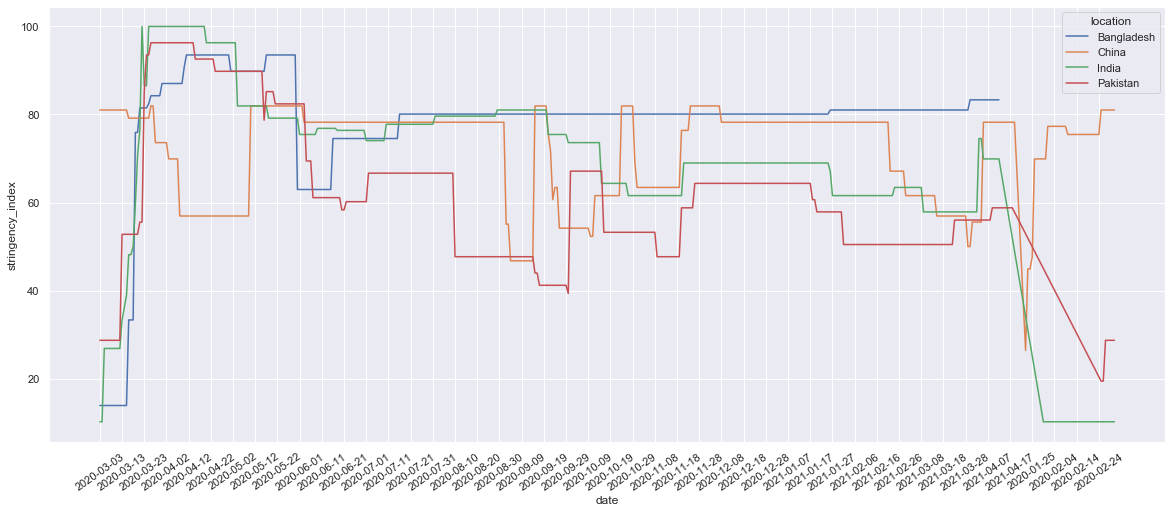

In [209]:
#setting theme and figure size
sb.set_theme(style='darkgrid')
plt.figure(figsize=(20,8))

#creating data for specific location
data_asia = data.loc[(data['location']=='India') | (data['location']=='China') | (data['location']=='Bangladesh') | (data['location']=='Pakistan')]
#reseting index with date
data_asia1 = data_asia.reset_index().set_index('date')

#plot
ax2 = sb.lineplot(x=data_asia1.index, y='stringency_index', data = data_asia1, hue='location')
ax2.set_xticks(ax2.get_xticks()[::10])

plt.xticks(rotation=35)
plt.show()

Total Vaccinations continent wise

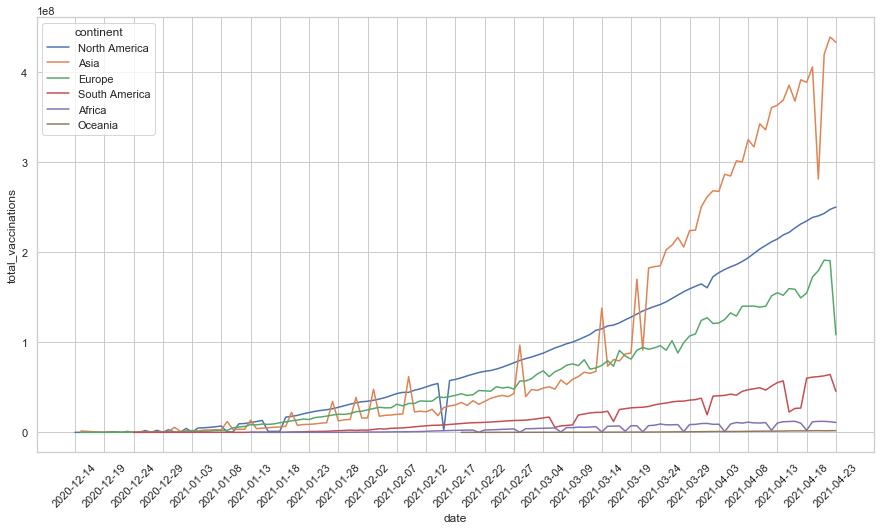

In [213]:
#setting theme and figure size
sb.set_theme(style='whitegrid')
plt.figure(figsize=(15,8))

#plot
ax=sb.lineplot(x='date', y='total_vaccinations', data = dg[dg.total_vaccinations>0], hue = 'continent')
#setting x labels to show
ax.set_xticks(ax.get_xticks()[::5])

plt.xticks(rotation=45)
plt.show()

New_Cases, New_Death, New_Test, New_Vaccination for India since 1 Dec, 2020

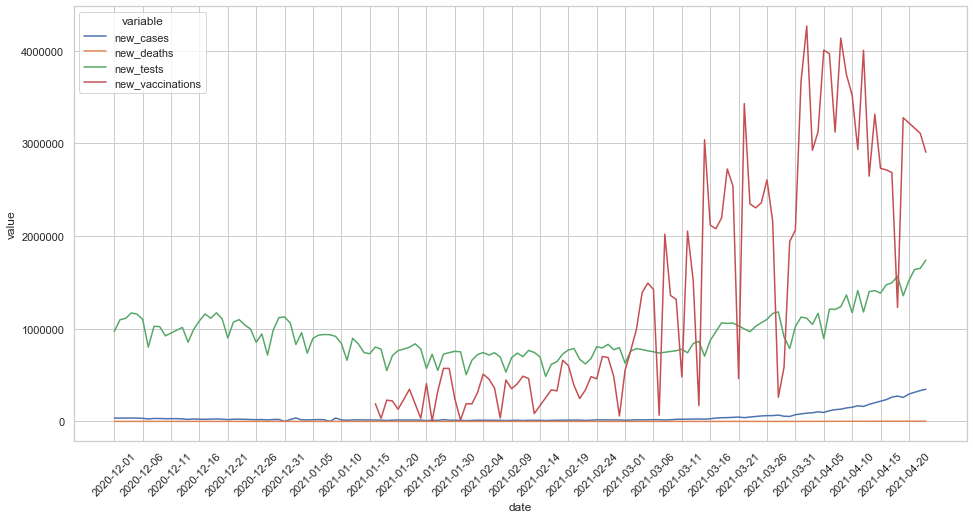

In [226]:
#setting figure size
plt.figure(figsize=(16,8))

#creating sample data as required
sample_data=data.loc[(data['location']=='India') & (data['date'] >= '2020-12-01') , ['date','location','new_cases','new_deaths','new_tests','new_vaccinations']]
#setting index
sample_data = pd.melt(sample_data, ['date','location'])

#plot
ax = sb.lineplot(x='date', y='value', data= sample_data, hue='variable')
ax.set_xticks(ax.get_xticks()[::5])

plt.xticks(rotation=45)
plt.show()

# PLots with Colour defination

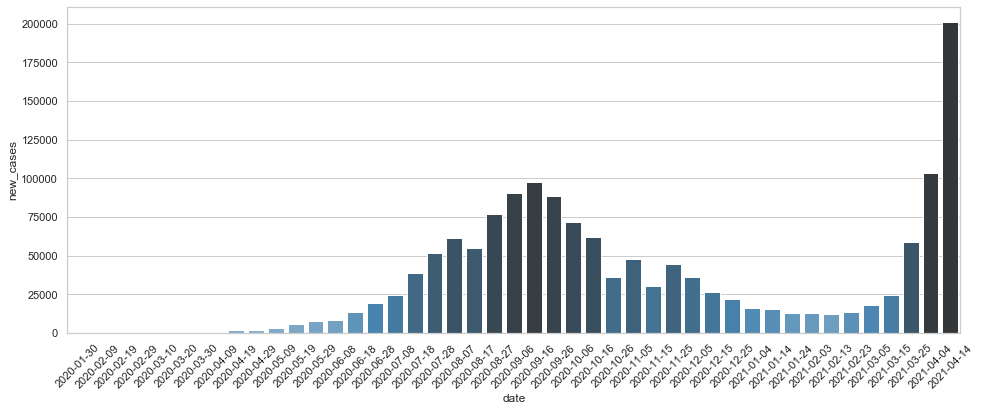

In [227]:
y_col = data_india['new_cases'][::10] #ycol values
pal = sb.color_palette('Blues_d',len(y_col)) #creating palette object respective to len of y col
rank= y_col.argsort().argsort() #creating rank for y col

#figure size
plt.figure(figsize=(16,6))

#plot new cases represting values respective to colors
ax = sb.barplot(x='date', y='new_cases', palette=np.array(pal[::1])[rank], data= data_india[::10])

plt.xticks(rotation=45)
plt.show()

Stacked Bar plot for New tests against New cases

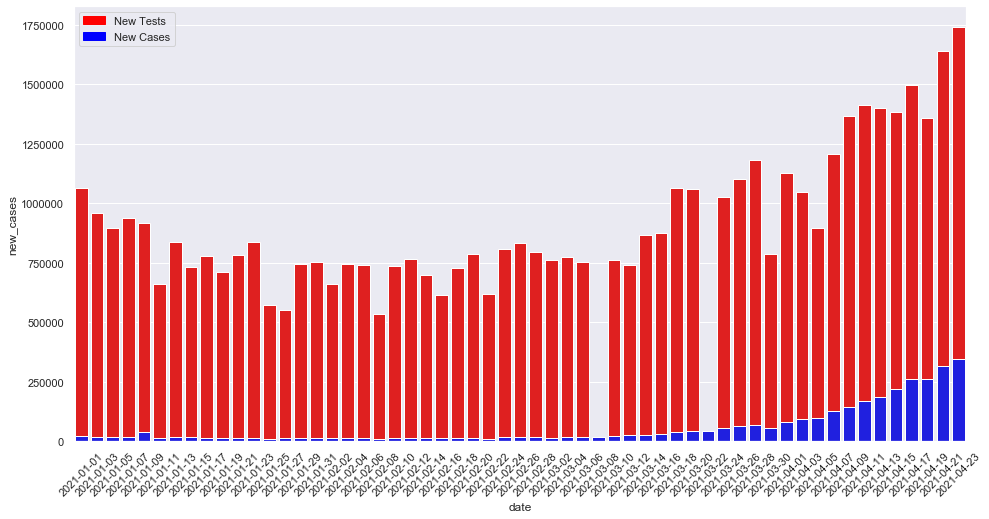

In [228]:
import matplotlib.patches as mpatches #for label

plt.figure(figsize=(16,8))
sb.set_theme(style='darkgrid')

#creating data using slice to filter records
data_india_2021 = data_india[data_india['date'].str.slice(0,4)=='2021']

#plot1
new_test = sb.barplot(x='date', y='new_tests', data=data_india_2021[::2], color='red')
#plot2
new_cases = sb.barplot(x='date', y='new_cases', data=data_india_2021[::2], color='blue')

#creating label object
top_bar = mpatches.Patch(color='red', label='New Tests')
bottom_bar = mpatches.Patch(color='blue', label ='New Cases')
plt.legend(handles=[top_bar,bottom_bar], loc=2)

plt.xticks(rotation=45)
plt.show()

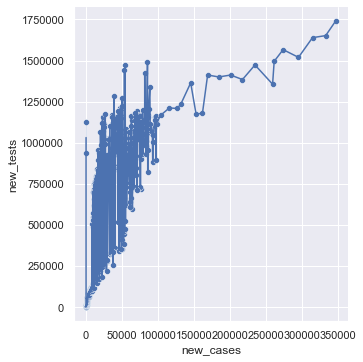

In [100]:
#combined plot for line and relplot
sb.relplot(x='new_cases', y='new_tests', data= data_india)
sb.lineplot(x='new_cases', y='new_tests', data= data_india)

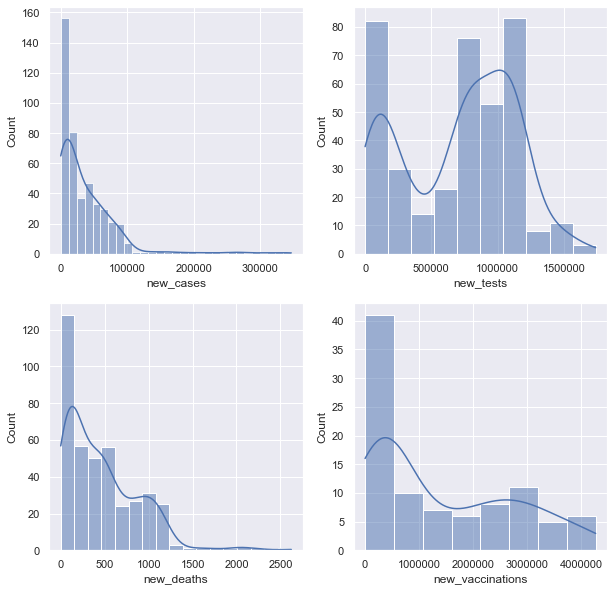

In [229]:
#Example of histplot with subplots

fig, axes = plt.subplots(2,2,figsize=(10,10))
sb.set_theme(style = 'darkgrid')

sb.histplot(x='new_cases', data=data_india, kde=True, ax=axes[0,0])
sb.histplot(x='new_tests', data=data_india, kde=True, ax=axes[0,1])
sb.histplot(x='new_deaths', data=data_india, kde=True, ax=axes[1,0])
sb.histplot(x='new_vaccinations', data=data_india, kde=True, ax=axes[1,1])